# 🛍️ Project 1 — EDA on Retail Sales Data
**Internship:** Oasis Infobyte  
**Author:** Riya Prajapati  
**Date:** 2025-10-06  
**Dataset:** https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

**Goal:** Explore sales data, find trends, customer/product insights, and give actionable recommendations.

## 2. Project Objectives
- Load and clean the retail sales data
- Generate descriptive statistics
- Conduct time-series analysis (sales over time)
- Analyze customer & product behavior
- Visualize key findings (bar charts, line plots, heatmaps)
- Provide actionable recommendations

## 3. Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

## 4. Load the Dataset

Let's load the dataset into a pandas DataFrame and take a quick look at its shape.

In [10]:
file_path = r"C:\Users\as\Downloads\archive (1)\retail_sales_dataset.csv"
df = pd.read_csv(file_path)
df.shape

(1000, 9)

## 5. Initial Data Overview

Let's view a few rows, check data types, and get a basic understanding of the dataset.

In [13]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [17]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Date,1000,345,2023-05-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,1000,1000,CUST001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,13.68143,18.0,29.0,42.0,53.0,64.0
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.132734,1.0,1.0,3.0,4.0,4.0
Price per Unit,1000.0,NaN,NaN,NaN,179.89,189.681356,25.0,30.0,50.0,300.0,500.0
Total Amount,1000.0,NaN,NaN,NaN,456.0,559.997632,25.0,60.0,135.0,900.0,2000.0


## 6. Column Name Normalization

Standardizing column names for easier referencing during analysis.

In [20]:
df.columns = [c.strip().lower().replace(' ','_').replace('/','_') for c in df.columns]
df.columns.tolist()

['transaction_id',
 'date',
 'customer_id',
 'gender',
 'age',
 'product_category',
 'quantity',
 'price_per_unit',
 'total_amount']

## 7. Identify Key Columns

We'll detect columns likely related to date, sales, quantity, product, customer, or region.

In [23]:
cols = df.columns.tolist()

possible_date_cols = [c for c in cols if 'date' in c or 'time' in c or 'day' in c]
possible_price_cols = [c for c in cols if 'price' in c or 'amount' in c or 'total' in c or 'sales' in c]
possible_qty_cols = [c for c in cols if 'qty' in c or 'quantity' in c or 'units' in c]
possible_product_cols = [c for c in cols if 'product' in c or 'item' in c or 'sku' in c or 'name' in c]
possible_customer_cols = [c for c in cols if 'customer' in c or 'client' in c or 'cust' in c or 'user' in c]
possible_region_cols = [c for c in cols if 'region' in c or 'state' in c or 'city' in c or 'country' in c]

possible_date_cols, possible_price_cols, possible_qty_cols, possible_product_cols, possible_customer_cols, possible_region_cols

(['date'],
 ['price_per_unit', 'total_amount'],
 ['quantity'],
 ['product_category'],
 ['customer_id'],
 [])

## 8. Handle Missing Values and Duplicates

We'll check for missing values and duplicates, then decide appropriate cleaning strategies.

In [26]:
df.isnull().sum().sort_values(ascending=False)

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [28]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


## 9. Data Cleaning

No missing values or duplicate rows were found in the dataset, so no additional cleaning was required in this step.

## 10. Date Conversion and Feature Extraction

We'll convert date column to datetime and extract year, month, day, weekday features for time series analysis.

In [32]:
date_col = 'date'
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df['year'] = df[date_col].dt.year
df['month'] = df[date_col].dt.month
df['day'] = df[date_col].dt.day
df['weekday'] = df[date_col].dt.day_name()

## 11. Descriptive Statistics

Let's compute basic statistics like mean, median, standard deviation for numeric columns.

In [35]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].agg(['mean','median','std','min','max']).T

,mean,median,std,min,max
transaction_id,500.500,500.5,288.819436,1.0,1000.0
age,41.392,42.0,13.681430,18.0,64.0
quantity,2.514,3.0,1.132734,1.0,4.0
price_per_unit,179.890,50.0,189.681356,25.0,500.0
total_amount,456.000,135.0,559.997632,25.0,2000.0
year,2023.002,2023.0,0.044699,2023.0,2024.0
month,6.549,6.0,3.452755,1.0,12.0
day,15.310,15.0,8.871674,1.0,31.0


## 12. Average Order Value (AOV) and orders count

In [40]:
n_orders = df['transaction_id'].nunique()
total_sales = df['total_amount'].sum()
aov = total_sales / n_orders if n_orders>0 else 0
print(f"Orders: {n_orders}, Total Sales: {total_sales:,.2f}, AOV: {aov:,.2f}")

Orders: 1000, Total Sales: 456,000.00, AOV: 456.00


## 13. Time Series Analysis

We'll examine how `total_amount` (sales) varies over time. First, we'll look at monthly trends to see if there's any seasonality or growth pattern.

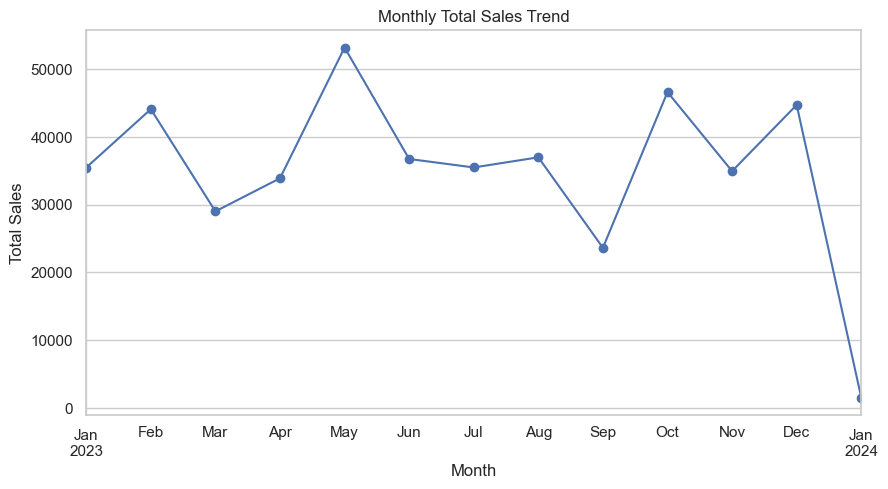

'May'

In [43]:
df['date'] = pd.to_datetime(df['date'])
monthly_sales = df.set_index('date').resample('M')['total_amount'].sum()
monthly_sales

monthly_sales.plot(marker='o', figsize=(10,5))
plt.title('Monthly Total Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()

monthly_sales.idxmax().strftime('%B')

## 14. Customer and Product Analysis

Here, we'll explore which product categories contribute the most to sales, who the top customers are, and the distribution of customers by gender and age.

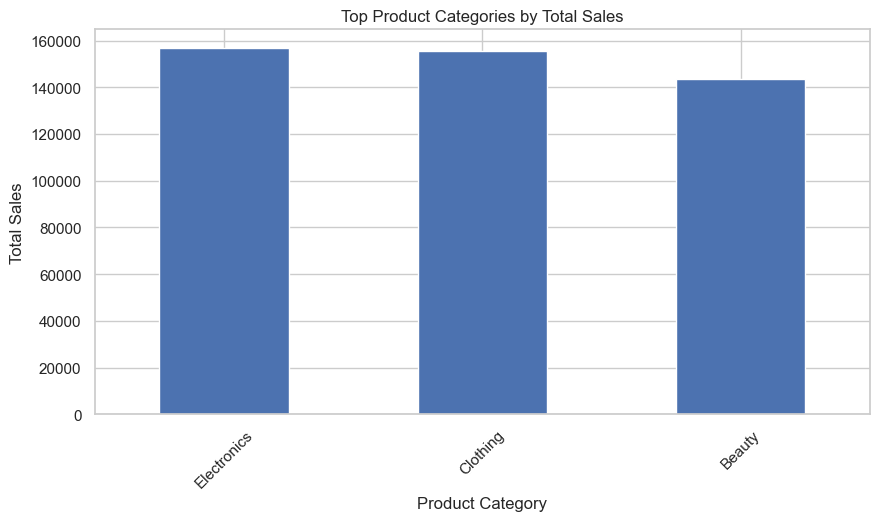

In [48]:
df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar', figsize=(10,5)
)
plt.title('Top Product Categories by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

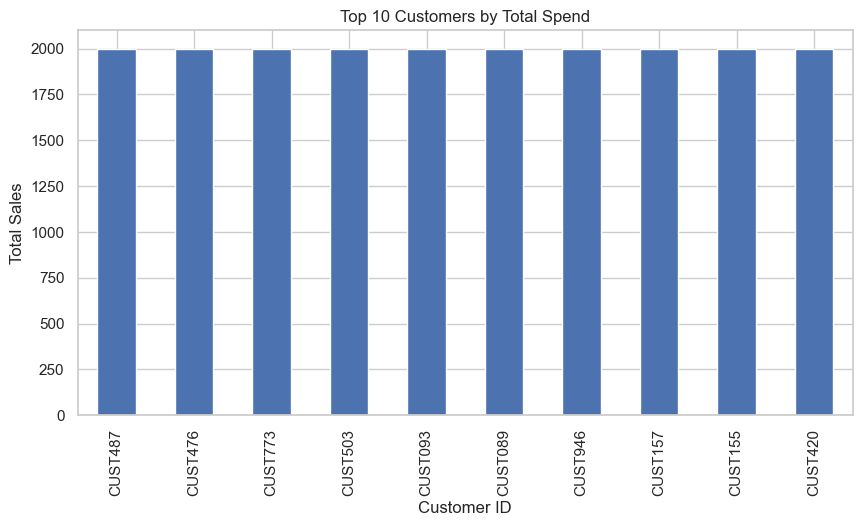

In [50]:
## 15. Top customers:
df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar', figsize=(10,5)
)
plt.title('Top 10 Customers by Total Spend')
plt.ylabel('Total Sales')
plt.xlabel('Customer ID')
plt.show()

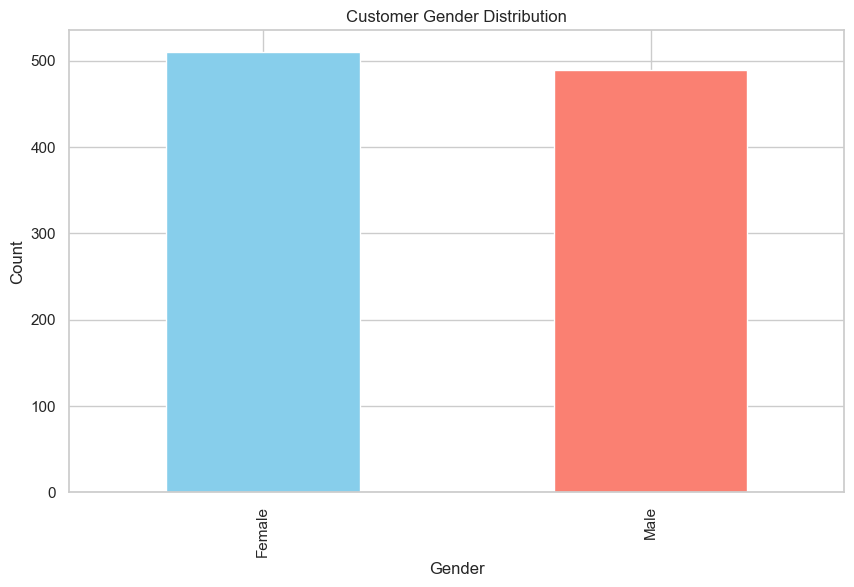

In [52]:
## 16. Gender distribution:
df['gender'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

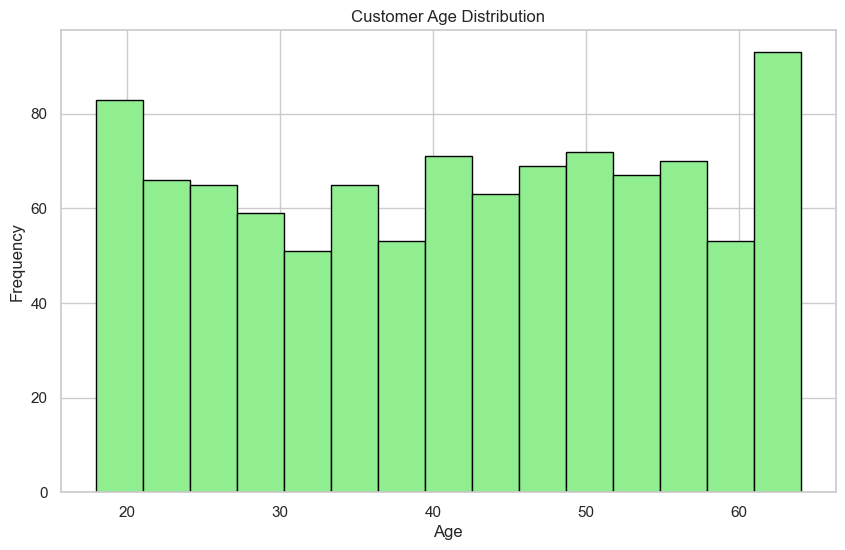

In [54]:
## 17. Age distribution:
plt.hist(df['age'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 18. Visualizations

Let's create additional plots such as heatmaps and weekday-wise sales trends to visualize relationships and patterns in the data.

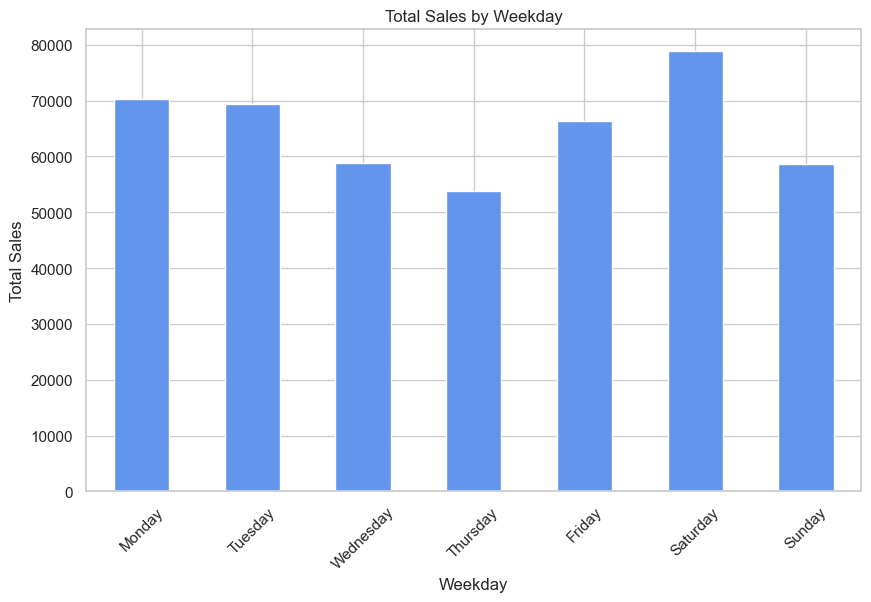

In [57]:
weekday_sales = df.groupby('weekday')['total_amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
weekday_sales.plot(kind='bar', color='cornflowerblue')
plt.title('Total Sales by Weekday')
plt.ylabel('Total Sales')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.show()

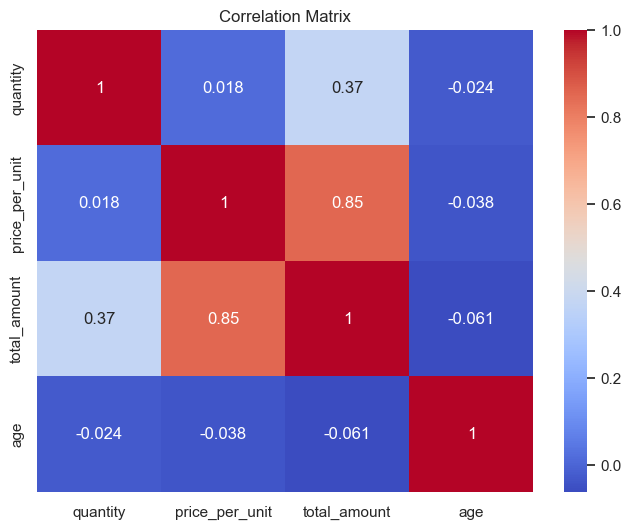

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['quantity','price_per_unit','total_amount','age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

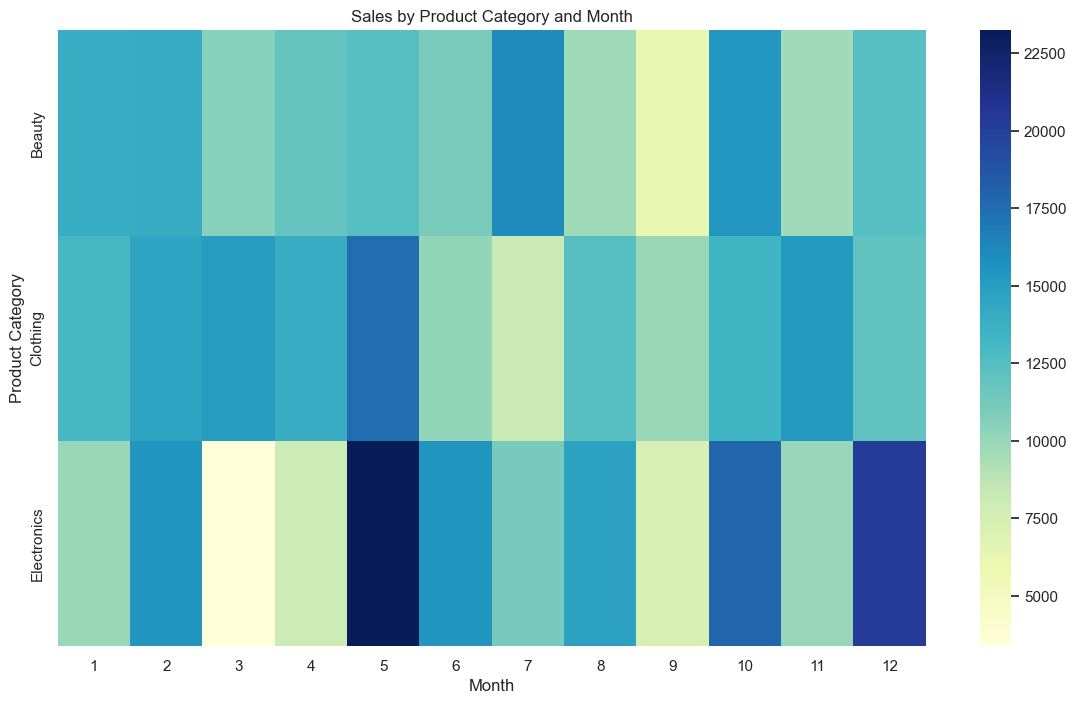

In [61]:
pivot = df.pivot_table(index='product_category', columns='month', values='total_amount', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Sales by Product Category and Month')
plt.ylabel('Product Category')
plt.xlabel('Month')
plt.show()

## 19. Insights & Recommendations

### Key Insights
- Product category **Electronics** contributes the highest sales overall.  
- Monthly trend shows a clear peak during **May**, indicating seasonality.  
- **Female** customers account for a larger share of transactions.  
- Age distribution shows higher frequencies among the **18–22** and **60–65** age ranges, indicating these groups form a significant portion of the customer base. This can inform targeted marketing strategies (e.g., student offers and senior loyalty programs).  
- Weekday analysis shows highest sales on **Saturday**, useful for targeted campaigns.

### Recommendations
- Focus inventory and marketing on top product categories during peak months.  
- Launch targeted campaigns for the dominant age group & gender segment.  
- Offer weekday promotions on low-sales days to balance weekly performance.  
- Consider loyalty programs for top-spending customers to increase retention.

## 20. Save cleaned data for reproducibility

In [65]:
import os
os.makedirs('data', exist_ok=True)
df.to_csv('data/retail_sales_cleaned.csv', index=False)
print("Saved cleaned dataset -> data/retail_sales_cleaned.csv")

Saved cleaned dataset -> data/retail_sales_cleaned.csv
